In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('house.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [5]:
df.head(10)

FireplaceQu GarageQual  SalePrice
0         NaN         TA     208500
1          TA         TA     181500
2          TA         TA     223500
3          Gd         TA     140000
4          TA         TA     250000
5         NaN         TA     143000
6          Gd         TA     307000
7          TA         TA     200000
8          TA         Fa     129900
9          TA         Gd     118000

In [6]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [7]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

# Most frequent value imputation on garagequal columns

<AxesSubplot: >

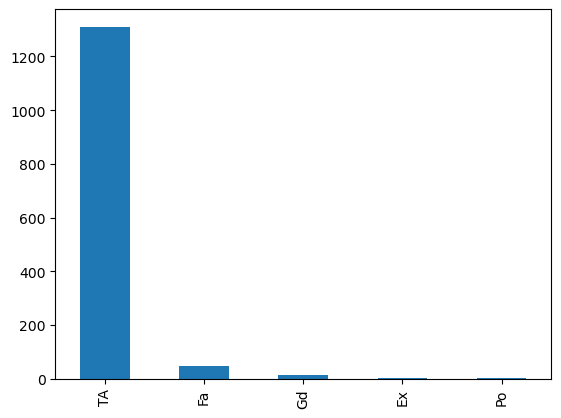

In [11]:
df['GarageQual'].value_counts().plot(kind='bar')

In [12]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

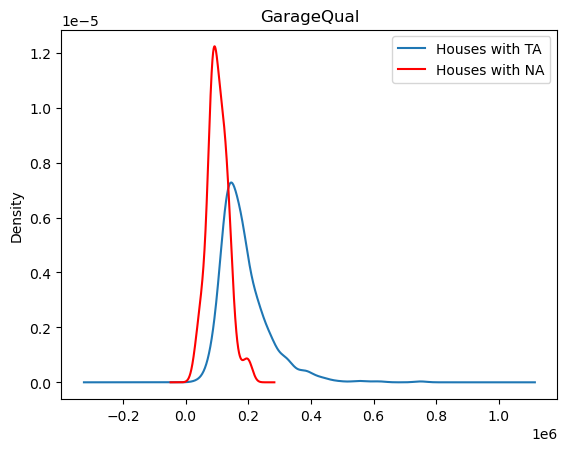

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [14]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [15]:
# filling null values with most frequent value TA
df['GarageQual'].fillna('TA', inplace=True)

<AxesSubplot: >

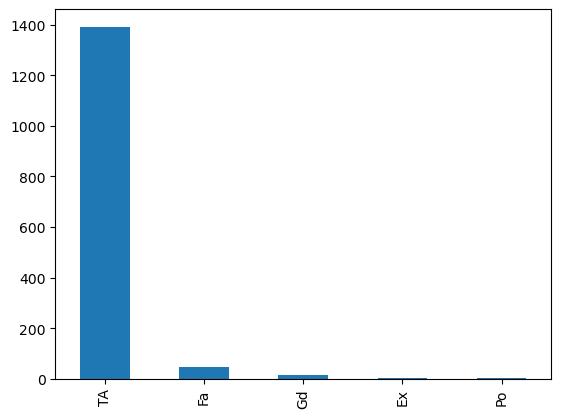

In [16]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

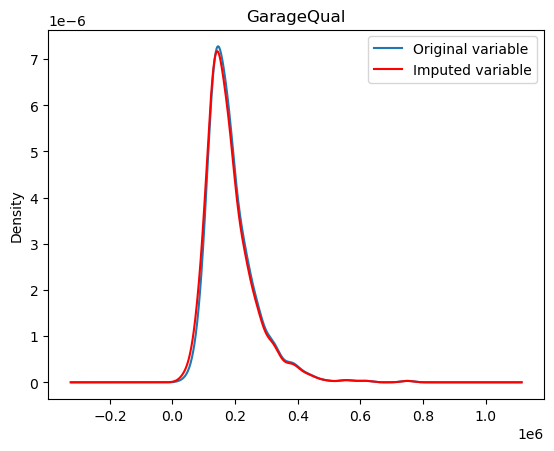

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

# Most frequent value imputation on fireplace columns


<AxesSubplot: >

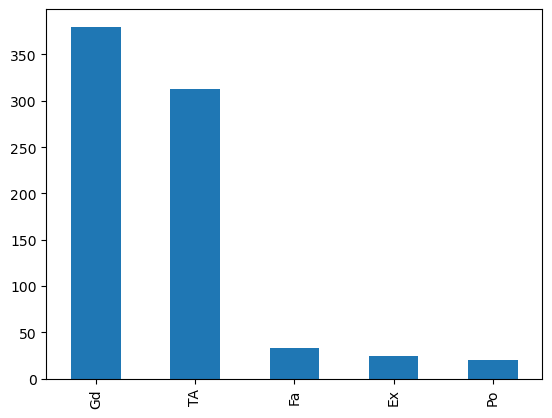

In [18]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [19]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

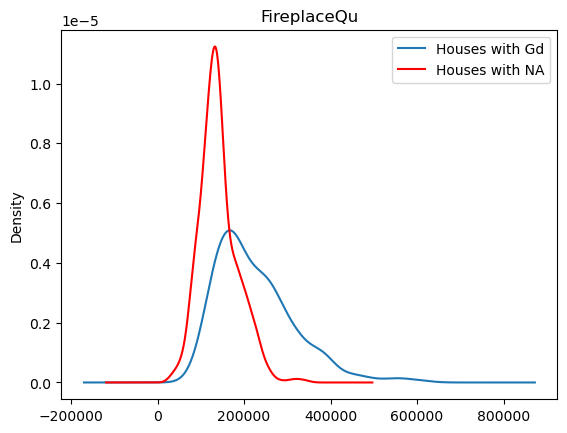

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [21]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [22]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<AxesSubplot: >

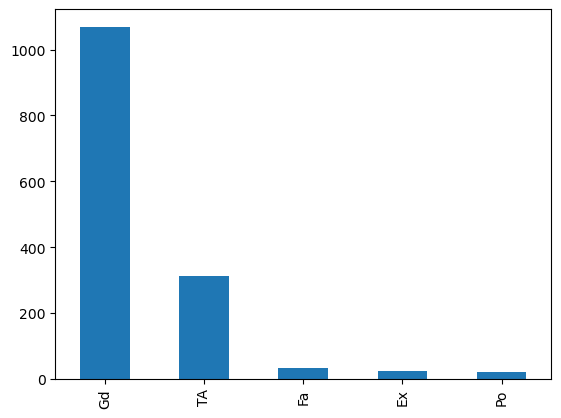

In [23]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

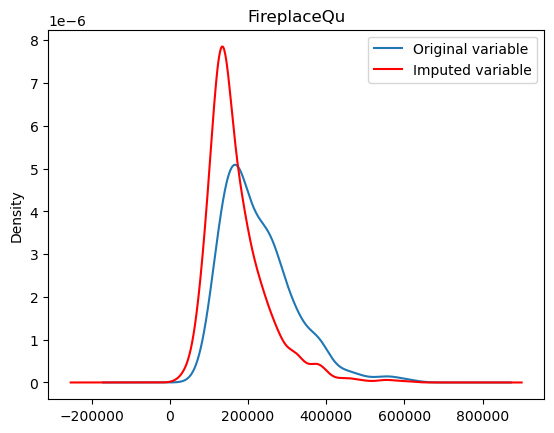

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

# by using sklearn

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
imputer = SimpleImputer(strategy='most_frequent')

In [28]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\zuhai\anaconda3\envs\AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
